# Question No 1

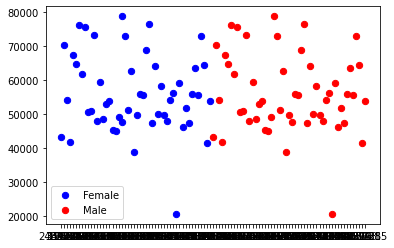

In [41]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

path = r'C:\Users\Admin\Downloads\Assignment'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

frame = pd.concat(li, axis=0 ,ignore_index=True)
frame.drop(frame.iloc[:1,:1].columns,axis=1,inplace=True)
frame.fillna(method='ffill',inplace=True)
frame = frame.replace('%','',regex=True)
frame['Income'] = frame['Income'].str.replace('$','',regex=True)
frame.iloc[:,2:-1] = frame.iloc[:,2:-1].astype(float).round(0).astype(int)
frame.drop_duplicates(inplace=True,ignore_index=True)
frame[['Male','Female']] = frame.GenderPop.str.split('_',expand=True,)
frame = frame.rename(columns={0:'Male',1:'Female'})
frame = frame.drop(['GenderPop'],axis=1)
frame[['Male','Female']] = frame[['Male','Female']].replace(['M','F'],['',''],regex=True)
frame = frame.replace('',0)
plt.scatter(frame.Female.astype(str), frame.Income, s=40, c='b', label='Female')
plt.scatter(frame.Male, frame.Income, s=40, c='r', label='Male') 
plt.legend()
# frame

# Question No. 2

In [39]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

df = pd.read_csv('inventory/inventory.csv')
staten_island = df.head(10)
product_request = staten_island['product_description']
seed_request = df.where(df.location == 'Brooklyn')
seed_request = seed_request.where(df.product_type == 'seeds')
seed_request = seed_request.dropna()
seed_request['in_stock'] = seed_request['quantity'].astype(int) > 0
seed_request['total_value'] = seed_request.quantity * seed_request.price
seed_request['full_description'] = seed_request['product_type'] + ' ' + seed_request['product_description']
seed_request

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
10,Brooklyn,seeds,daisy,50.0,6.99,True,349.5,seeds daisy
11,Brooklyn,seeds,calla lily,0.0,19.99,False,0.0,seeds calla lily
12,Brooklyn,seeds,tomato,0.0,13.99,False,0.0,seeds tomato
